<a href="https://colab.research.google.com/github/SuryARavichan/Chatbot/blob/main/S10_AR_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
import random
random.seed(1)

AR: Autoregression. A model that uses the dependent relationship between an observation
and some number of lagged observations.


I: Integrated. The use of differencing of raw observations (i.e. subtracting an observation
from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and
residual errors from a moving average model applied to lagged observations.

ARIMA (p,d,q)
* p: The number of lag observations included in the model, also called the lag order.
* d: The number of times that the raw observations are differenced, also called the degree of differencing.
* q:The size of the moving average window, also called the order of moving average.

Box - Jenkinss (1970): any TS can be approximated by ARMA (if stationary) or ARIMA (if non-stationary)

In [ ]:
T=pd.read_csv('/content/drive/My Drive/Time Series/daily-minimum-temperatures.csv',header=0,parse_dates=[0],index_col=0,squeeze=True)
T.head(20)


Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
1981-01-06    15.8
1981-01-07    15.8
1981-01-08    17.4
1981-01-09    21.8
1981-01-10    20.0
1981-01-11    16.2
1981-01-12    13.3
1981-01-13    16.7
1981-01-14    21.5
1981-01-15    25.0
1981-01-16    20.7
1981-01-17    20.6
1981-01-18    24.8
1981-01-19    17.7
1981-01-20    15.5
Name: Temp, dtype: float64

In [ ]:
T.shape

(3650,)

<Axes: xlabel='Date'>

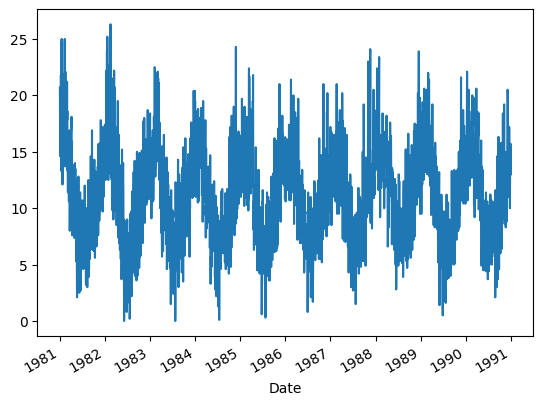

In [ ]:
T.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

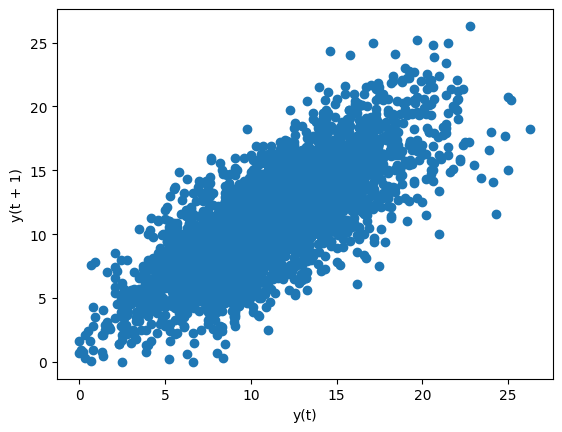

In [ ]:
#Autocorrelation Plot
pd.plotting.lag_plot(T)

In [ ]:
values=pd.DataFrame(T.values)
df=pd.concat([values.shift(1), values],axis=1)
df.columns=['t','t+1']
res=df.corr()
print(res)

           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

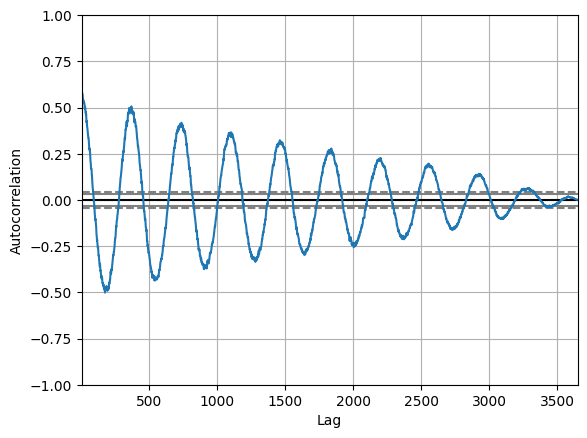

In [ ]:
pd.plotting.autocorrelation_plot(T)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

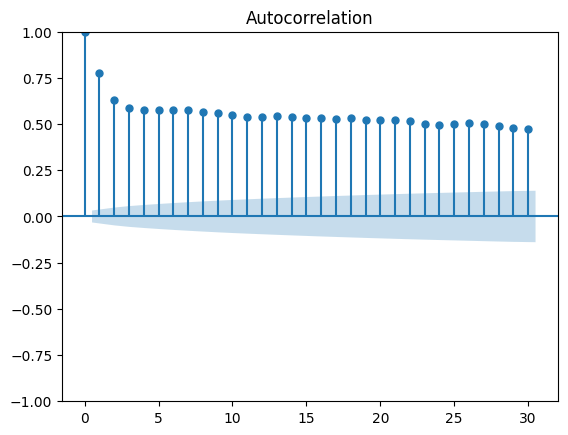

In [ ]:
plot_acf(T,lags=30)
plt.show()

In [ ]:
df.head()

,t,t+1
0,NaN,20.7
1,20.7,17.9
2,17.9,18.8
3,18.8,14.6
4,14.6,15.8


Evaluate a Persistence Model

Test RMSE: 1.850


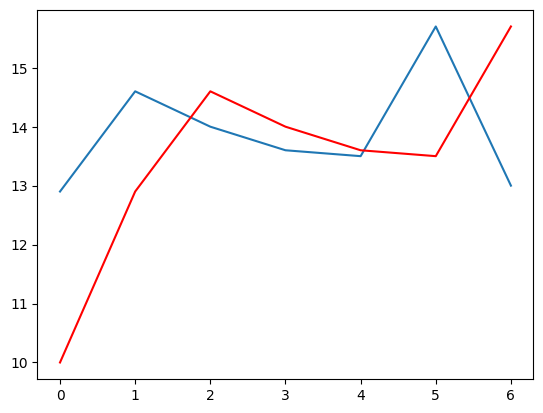

In [ ]:
#Train/Test split
#Last 7-days is reserved for TEST data
from sklearn import metrics
X=df.values
train,test=X[1:len(X)-7],X[len(X)-7:]
train_X,train_Y=train[:,0],train[:,1]
test_X,test_Y=test[:,0],test[:,1]
#persistence model
def model_persistence(x):
  return x
#walk-forward validation
predictions=list()
for x in test_X:
  yhat=model_persistence(x)
  predictions.append(yhat)
rmse=np.sqrt(metrics.mean_squared_error(test_Y,predictions))
print('Test RMSE: %.3f'%rmse)
#plot predictions vs expected
plt.plot(test_Y)
plt.plot(predictions,color='red')
plt.show()


AUTO REGRESSION MODEL

In [ ]:
#from statsmodels.tsa.ar_model import AR   (earlier package)
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
X=T.values
train,test=X[:len(X)-7],X[len(X)-7:]

In [ ]:
train

array([20.7, 17.9, 18.8, ..., 13.2, 13.9, 10. ])

In [ ]:
model=AutoReg(X,lags=25)
model_fit=model.fit()

In [ ]:
len(model_fit.params)

31

In [ ]:
model_fit.params

array([ 5.57686804e-01,  5.88594726e-01, -9.08237852e-02,  4.82638774e-02,
        4.00710117e-02,  3.93069805e-02,  2.59455541e-02,  4.46626155e-02,
        1.27712467e-02,  3.74417671e-02, -8.04557022e-04,  4.78775134e-03,
        1.84836566e-02,  2.68943667e-02,  5.77802707e-04,  2.48172486e-02,
        7.40325356e-03,  9.92281888e-03,  3.41659931e-02, -9.11910728e-03,
        2.42126998e-02,  1.87980185e-02,  1.21888605e-02, -1.85409737e-02,
       -1.76328412e-03,  1.67434776e-02,  1.97727934e-02,  9.84690764e-03,
        6.20037698e-03, -1.20793825e-03, -2.87395298e-04])

In [ ]:
len(train)

3643

In [ ]:
X[3643]

12.9

In [ ]:
#make predictions
predictions=model_fit.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)
predictions

array([11.88807501, 13.09910598, 13.5963175 , 13.36895445, 13.18272089,
       13.19959652, 13.09782707])

In [ ]:
test

array([12.9, 14.6, 14. , 13.6, 13.5, 15.7, 13. ])

In [ ]:
for i in range(len(predictions)):
  print('predicted=%f,expected=%f' %(predictions[i],test[i]))

predicted=11.871487,expected=12.900000
predicted=13.053349,expected=14.600000
predicted=13.533952,expected=14.000000
predicted=13.244038,expected=13.600000
predicted=13.091560,expected=13.500000
predicted=13.147542,expected=15.700000
predicted=13.176736,expected=13.000000


In [ ]:
rmse=np.sqrt(metrics.mean_squared_error(test,predictions))
print('Test RMSE: %.3f' %rmse)


Test RMSE: 1.187


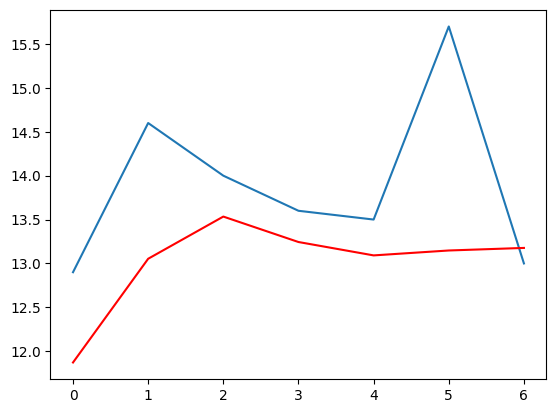

In [ ]:
#plot results
plt.plot(test)
plt.plot(predictions,color='red')
